<h1>Tâche 1 : Chargement des données</h1>

In [239]:
import pandas as pd
import os 

df = pd.read_csv(os.getcwd() + '/../data/raw/data.csv')

print('overview \n')
print(df.head)

print('columns list \n')
print(df.columns)

print('columns list \n')
print(df.dtypes)


overview 

<bound method NDFrame.head of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>
columns list 

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')
columns list 

age        

<h1>Tâche 2 : Analyse exploratoire des données (EDA)</h1>

In [240]:
# Comprendre la structure générale du jeu de données


print("Dataset dimensions:", df.shape)

print("\nColumn types:\n", df.dtypes)

print("\nFirst 5 rows:\n", df.head())
print("\nLast 5 rows:\n", df.tail())



Dataset dimensions: (1338, 7)

Column types:
 age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

First 5 rows:
    age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Last 5 rows:
       age     sex    bmi  children smoker     region     charges
1333   50    male  30.97         3     no  northwest  10600.5483
1334   18  female  31.92         0     no  northeast   2205.9808
1335   18  female  36.85         0     no  southeast   1629.8335
1336   21  female  25.80         0     no  southwest   2007.9450
1337   61  female  29.07         0    yes  northwest  29141.

In [241]:
import pandas as pd
import os


# Effectuer une analyse descriptive des données

print(df.describe())

print(df['sex'].value_counts())
print(df['smoker'].value_counts())
print(df['region'].value_counts())






               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010
sex
male      676
female    662
Name: count, dtype: int64
smoker
no     1064
yes     274
Name: count, dtype: int64
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


In [242]:
# Identifier les valeurs manquantes et les doublons


print(df[df.isnull().any(axis=1)])

print(df[df.duplicated()])


Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []
     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631


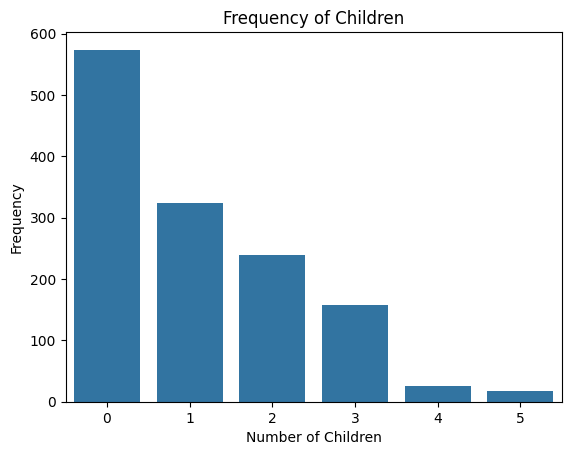

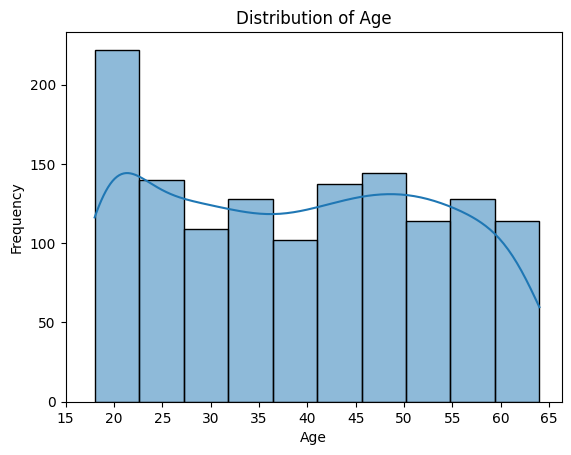

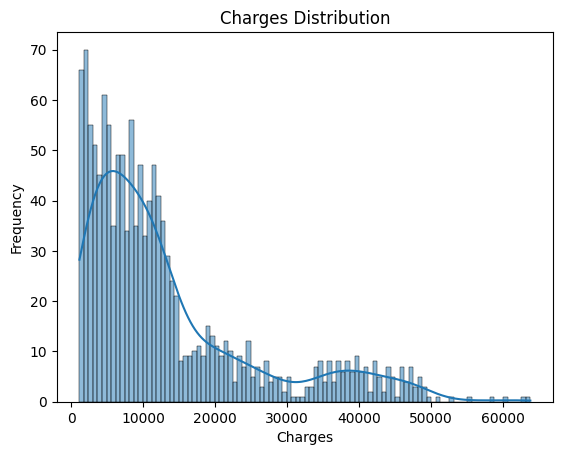

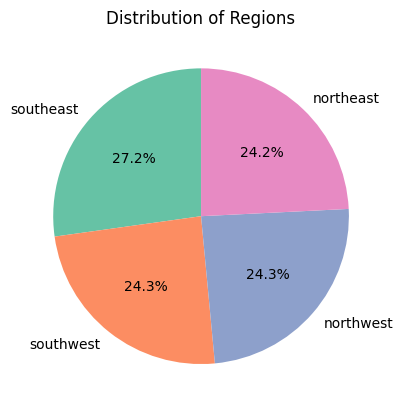

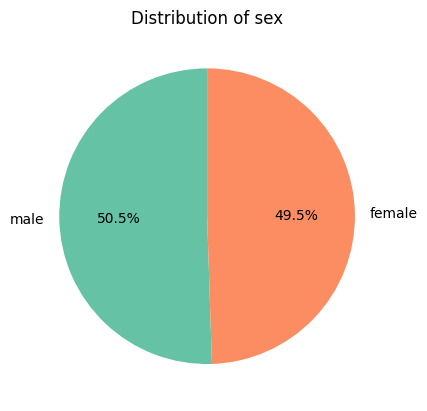

In [243]:
import seaborn as sns
import matplotlib.pyplot as plt

# Analyser la distribution des variables numériques


sns.countplot(x="children", data=df)
plt.title("Frequency of Children")
plt.xlabel("Number of Children")
plt.ylabel("Frequency")
plt.show()


sns.histplot(df["age"], bins=10, kde=True)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.xticks(ticks=range(15, 70, 5))
plt.show()



sns.histplot(df['charges'], bins=100, kde=True)
plt.title('Charges Distribution')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()


region_counts = df['region'].value_counts()

colors = sns.color_palette("Set2", n_colors=4)
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', 
        startangle=90, colors=colors)
plt.title("Distribution of Regions")
plt.show()


sex_counts = df['sex'].value_counts()

colors = sns.color_palette("Set2", n_colors=2)
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', 
        startangle=90, colors=colors)
plt.title("Distribution of sex")
plt.show()



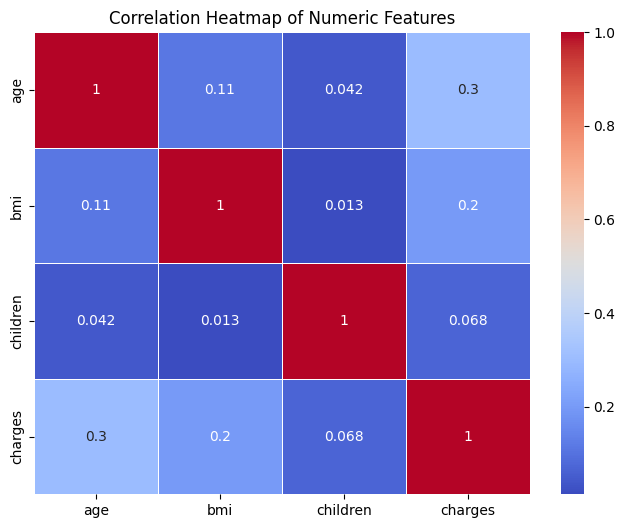

In [244]:

import seaborn as sns
import matplotlib.pyplot as plt


# Étudier les relations entre variables à l'aide de matrices de corrélation et de visualisations


corr = df.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title("Correlation Heatmap of Numeric Features")
plt.show()


<h1>Tâche 3 : Prétraitement des données</h1>

In [245]:
import os

# Gestion des valeurs manquantes
print(df.isnull().sum())

numeric_cols = df.select_dtypes(include='number').columns
for col in numeric_cols:
    median = df[col].median()
    df[col] = df[col].fillna(median)   

categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    mode = df[col].mode()[0]
    df[col] = df[col].fillna(mode)     

print(df.isnull().sum())


print("Duplicates before:", df.duplicated().sum())
df = df.drop_duplicates()
print("Duplicates after:", df.duplicated().sum())


df.to_csv(os.getcwd() + "/../data/processed/pdata.csv", index=False)


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
Duplicates before: 1
Duplicates after: 0


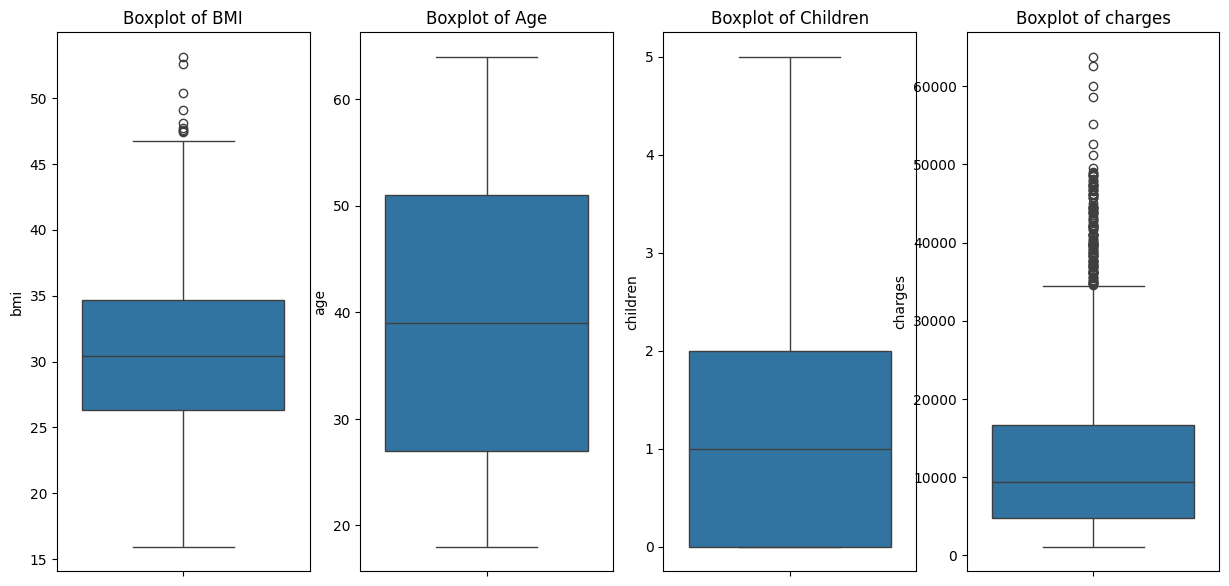

Original size: (1337, 7)
After removing outliers: (1328, 7)


In [246]:
import seaborn as sns
import matplotlib.pyplot as plt
import os

import matplotlib.pyplot as plt





# Détection et gestion des valeurs aberrantes



plt.figure(figsize=(15, 7))

plt.subplot(1, 4, 1)
sns.boxplot(y="bmi", data=df)
plt.title("Boxplot of BMI")

plt.subplot(1, 4, 2)
sns.boxplot(y="age", data=df)
plt.title("Boxplot of Age")

plt.subplot(1, 4, 3)
sns.boxplot(y="children", data=df)
plt.title("Boxplot of Children")


plt.subplot(1, 4, 4)
sns.boxplot(y="charges", data=df)
plt.title("Boxplot of charges")

plt.show()


Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['bmi'] >= lower_bound) & (df['bmi'] <= upper_bound)]

print("Original size:", df.shape)
print("After removing outliers:", df_no_outliers.shape)


df_no_outliers.to_csv(os.getcwd() + "/../data/processed/pdata.csv", index=False)
df = df_no_outliers




<h3>Ajouter une colonne qui represente le logarithme des charges </h3>


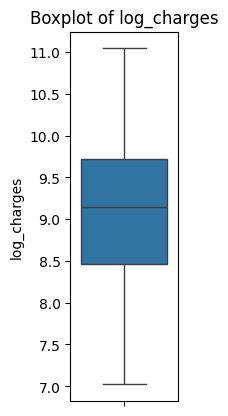

Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, log_charges]
Index: []


In [247]:
import numpy as np

df["log_charges"] = np.log(df["charges"]+.000000000001)

plt.subplot(1, 4, 4)
sns.boxplot(y="log_charges", data=df)
plt.title("Boxplot of log_charges")

plt.show()

print(df[df['charges']==0] )

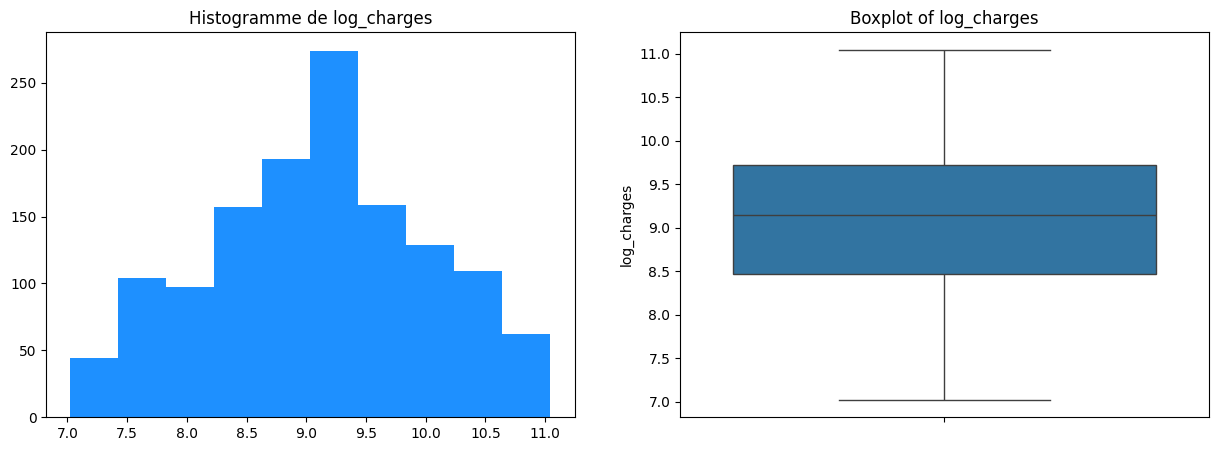

Max:  11.044406702204412
Min:  7.022755691174771


In [248]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.hist(df['log_charges'], color="dodgerblue")
plt.title("Histogramme de log_charges")

plt.subplot(1, 2, 2)
sns.boxplot(y=df["log_charges"])
plt.title("Boxplot of log_charges")
plt.show()

print("Max: ", df['log_charges'].max())
print("Min: ", df['log_charges'].min())

In [249]:
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder

# Encoder les variables catégoriques

le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df = pd.get_dummies(df, columns=['region'], drop_first=False)  
df.to_csv(os.getcwd() + "/../data/processed/pdata.csv", index=False)
print(df)





      age  sex     bmi  ...  region_northwest  region_southeast  region_southwest
0      19    0  27.900  ...             False             False              True
1      18    1  33.770  ...             False              True             False
2      28    1  33.000  ...             False              True             False
3      33    1  22.705  ...              True             False             False
4      32    1  28.880  ...              True             False             False
...   ...  ...     ...  ...               ...               ...               ...
1333   50    1  30.970  ...              True             False             False
1334   18    0  31.920  ...             False             False             False
1335   18    0  36.850  ...             False              True             False
1336   21    0  25.800  ...             False             False              True
1337   61    0  29.070  ...              True             False             False

[1328 rows x 11

In [250]:
from sklearn.preprocessing import MinMaxScaler
 
# Appliquer une normalisation (MinMaxScaler) ou une standardisation (StandardScaler) sur les variables numériques pour harmoniser les échelles.

numeric_cols = ['age', 'bmi', 'children', 'charges']


scaler = MinMaxScaler()


df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
df.to_csv(os.getcwd() + "/../data/processed/pdata.csv", index=False)

print(df.head()) 

        age  sex  ...  region_southeast  region_southwest
0  0.021739    0  ...             False              True
1  0.000000    1  ...              True             False
2  0.217391    1  ...              True             False
3  0.326087    1  ...             False             False
4  0.304348    1  ...             False             False

[5 rows x 11 columns]


In [251]:
from sklearn.model_selection import train_test_split
import os


# Diviser les données en ensembles d'entraînement et de test 


X = df.drop(['log_charges','charges'], axis=1)  
y = df['log_charges']              

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (1062, 9)
X_test shape: (266, 9)
y_train shape: (1062,)
y_test shape: (266,)


<h1>Feature Story 2 : Entraînement des Modèles de Régression</h1>

In [252]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, r2_score




lr = LinearRegression()
lr.fit(X_train, y_train)

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)

svr = SVR()
svr.fit(X_train, y_train)


models = {'LinearRegression': lr, 'RandomForest': rf, 'XGBoost': xgb, 'SVR': svr}

for name, model in models.items():
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred)  # RMSE
    r2 = r2_score(y_test, y_pred)
    print(f"{name}: RMSE = {rmse:.2f}, R² = {r2:.2f}")


LinearRegression: RMSE = 0.20, R² = 0.74
RandomForest: RMSE = 0.20, R² = 0.74
XGBoost: RMSE = 0.22, R² = 0.71
SVR: RMSE = 0.18, R² = 0.77


<h1>Linear regression pipeline</h1>

In [253]:
import os
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


df = pd.read_csv(os.path.join(os.getcwd(), '../data/raw/data.csv'))


df = df.drop_duplicates()


df['charges'] = np.log(df['charges'])


Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR




X = df.drop(['charges'], axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


numeric_features = ["age", "bmi", "children"]
categorical_features = ["sex", "smoker", "region"]

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
])



pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LinearRegression())
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)


from sklearn.metrics import mean_squared_error, r2_score


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)


print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

print(f"Root Mean Squared Error (RMSE): {rmse}")

linear_reg_pip = (mse,r2,rmse)




Mean Squared Error (MSE): 0.15828783951190992
R² Score: 0.8294642959644736
Root Mean Squared Error (RMSE): 0.39785404297544835


<h1>randomforest pipeline</h1>

In [254]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV






numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])


preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
])


pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(
        random_state = 42,
        max_depth= 5,
        min_samples_split= 5,
        n_estimators= 200
    ))
])


pipeline.fit(X_train, y_train)


y_pred = pipeline.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

random_for_pip = (mse,r2,rmse)





Mean Squared Error (MSE): 0.11007430986110667
Root Mean Squared Error (RMSE): 0.33177448645293184
R² Score: 0.8814084519299027


<h1>GridSearch in random forest</h1>

In [ ]:
param_grid = {
    "model__n_estimators": [100, 200, 300],   
    "model__max_depth": [None, 5, 10, 20],    
    "model__min_samples_split": [2, 5, 10]    
}


grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best parameters: {'model__max_depth': 5, 'model__min_samples_split': 5, 'model__n_estimators': 200}
Best cross-validation score: 0.8152584991043292


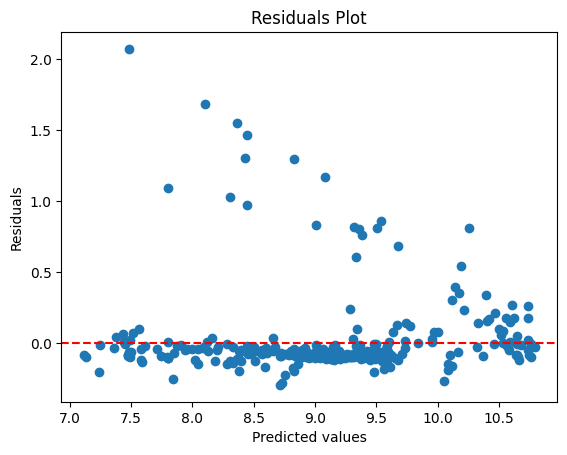

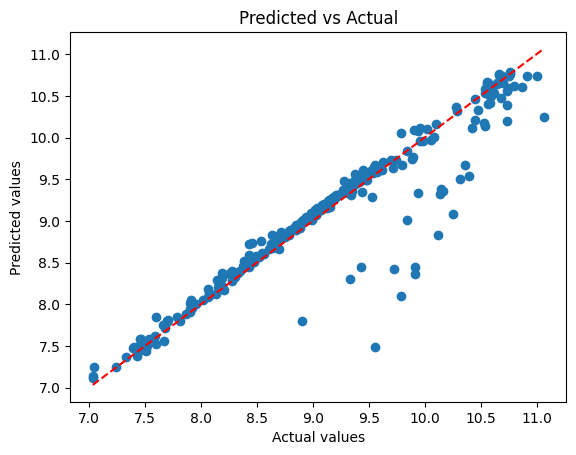

In [ ]:
import matplotlib.pyplot as plt


residuals = y_test - y_pred


plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Predicted vs Actual')
plt.show()

<h1>xgboost pipline</h1>

In [271]:
from xgboost import XGBRegressor



numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
])

pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", XGBRegressor(
        random_state = 42,
        learning_rate = 0.05, 
        max_depth= 3,
        subsample= 0.6
    ))
])


pipeline.fit(X_train, y_train)

y_pred_xg = pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred_xg)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_xg)

print(f"XGBoost - MSE: {mse}")
print(f"XGBoost - RMSE: {rmse}")
print(f"XGBoost - R²: {r2}")


xgb_bos_pip = (mse,r2,rmse)


XGBoost - MSE: 0.10507474630136306
XGBoost - RMSE: 0.32415235044861707
XGBoost - R²: 0.8867948675519763


<h1>GridSearch in xgboost</h1>

In [256]:
param_grid = {
    "model__learning_rate": [0.01, 0.05, 0.1],
    "model__max_depth": [3, 5, 7],
    "model__subsample": [0.6, 0.8, 1.0]
}

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best CV score:", grid_search.best_score_)

Best parameters: {'model__learning_rate': 0.05, 'model__max_depth': 3, 'model__subsample': 0.8}
Best CV score: 0.822579502522092


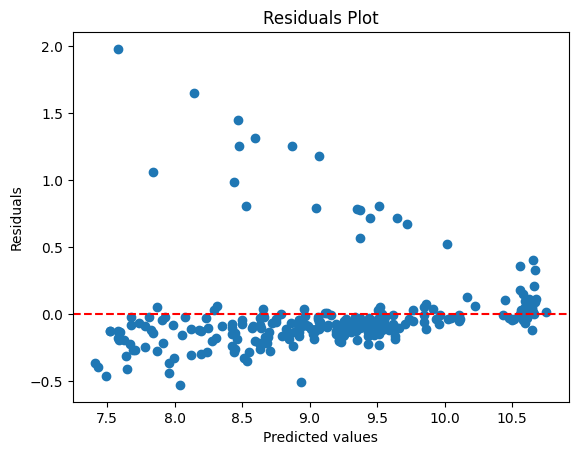

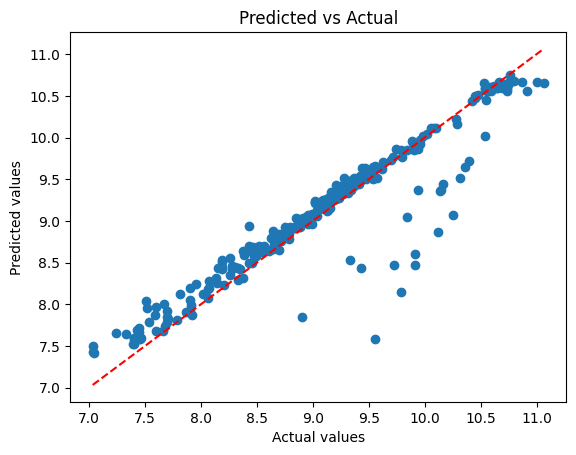

In [ ]:
import matplotlib.pyplot as plt


residuals = y_test - y_pred_xg


plt.scatter(y_pred_xg, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()


plt.scatter(y_test, y_pred_xg)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # diagonal line
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Predicted vs Actual')
plt.show()


<h1>svr pipeline</h1>

In [257]:
from sklearn.svm import SVR




numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())  
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])


preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
])


pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", SVR())
])


pipeline.fit(X_train, y_train)


y_pred = pipeline.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"SVR - MSE: {mse}")
print(f"SVR - RMSE: {rmse}")
print(f"SVR - R²: {r2}")

svr_pip = (mse,r2,rmse)


SVR - MSE: 0.10616912640020333
SVR - RMSE: 0.3258360422055905
SVR - R²: 0.8856158074219393


In [258]:
print(f"linear regression: {linear_reg_pip}")
print(f"random forest: {random_for_pip}")
print(f"xgboost: {xgb_bos_pip}")
print(f"svr: {svr_pip}")

linear regression: (0.15828783951190992, 0.8294642959644736, np.float64(0.39785404297544835))
random forest: (0.11007430986110667, 0.8814084519299027, np.float64(0.33177448645293184))
xgboost: (0.10507474630136306, 0.8867948675519763, np.float64(0.32415235044861707))
svr: (0.10616912640020333, 0.8856158074219393, np.float64(0.3258360422055905))
